In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import sklearn
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

In [144]:
random_seed = 20220517
random.seed = random_seed

np.random.seed = random_seed
#tf.random.set_seed(random_seed)

In [145]:
breast = load_breast_cancer() # boston은 Dictionary 형태

In [146]:
X = pd.DataFrame(breast['data'], columns = breast['feature_names']) # Dictionary 형태를 DataFrame 형태로 변환
Y = breast['target']

In [147]:
Y.shape

(569,)

In [148]:
np.unique(Y, return_counts = True)

(array([0, 1]), array([212, 357], dtype=int64))

<AxesSubplot:ylabel='count'>

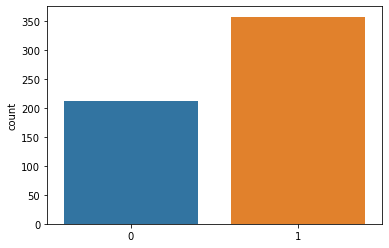

In [149]:
# Y의 Data 개수를 보여줌
sns.countplot(x=Y)

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
import tensorflow.keras as keras

In [169]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size = 0.2, random_state = random_seed)

In [170]:
# 얘는 두번 하면 안됨. 위의 train_test_split을 진행하고 나서 다시 실행!!
Train_Y = keras.utils.to_categorical(Train_Y, num_classes = 2)
Test_Y = keras.utils.to_categorical(Test_Y, num_classes = 2)

to_categorical()의 필요성

우리가 Output을 A,B,C,D,E 5개의 클래스가 있다고 하면... 0,1,2,3,4로 나오게 되면 이것은 확률이 아님.
따라서 우리는 확률적으로 보기 위해서 to_categorical()을 이용해서 다음과 같이 확률적 관점으로 봄

    |  A  |  B  |  C   |  D  |  E  |
    --------------------------------
    |  1  |  0  |  0   |  0  |  0  |
    |  0  |  1  |  0   |  0  |  0  |
    |  0  |  0  |  1   |  0  |  0  |
    |  0  |  0  |  0   |  1  |  0  |
    |  0  |  0  |  0   |  0  |  1  |

In [171]:
Train_Y.shape

(455, 2)

In [172]:
scaler_X = MinMaxScaler()
scaler_X.fit(Train_X)
#Scaled_Test_X = scaler_X.transform(Test_X)

MinMaxScaler()

In [173]:
Scaled_Train_X = scaler_X.transform(Train_X)
Scaled_Test_X = scaler_X.transform(Test_X)

In [174]:
X.shape

(569, 30)

In [175]:
tf.random.set_seed(random_seed)
model = keras.Sequential()

model.add(keras.layers.Dense(units = 5, input_shape = (30, ), activation = 'sigmoid'))
#model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
#model.add(keras.layers.Dense(units = 1 , activation = 'sigmoid')) 마지막 레이어를 이것 말고도
model.add(keras.layers.Dense(units = 2, activation = 'softmax'))

In [176]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 5)                 155       
                                                                 
 dense_25 (Dense)            (None, 5)                 30        
                                                                 
 dense_26 (Dense)            (None, 5)                 30        
                                                                 
 dense_27 (Dense)            (None, 2)                 12        
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [177]:
_loss = tf.keras.losses.CategoricalCrossentropy() # 우리가 사용하던 binary cross entropy와 동일하다!

In [178]:
lr = 0.1
model.compile(loss = _loss,optimizer = keras.optimizers.SGD(learning_rate = lr))

In [179]:
history = model.fit(Scaled_Train_X, Train_Y, batch_size = 32, epochs = 50, shuffle = True, verbose = 0 ,validation_split = 0.2) 
# verbose=0,1,2중 선택
# validation_split -> validation 데이터의 비율을 결정

In [180]:
train_loss = history.history['loss']
vali_loss = history.history['val_loss']

In [181]:
epochs = range(1, len(train_loss)+1)

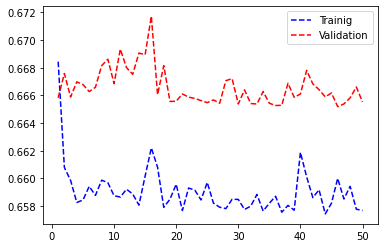

In [182]:
plt.plot(epochs, train_loss, '--b', label = 'Trainig')
plt.plot(epochs, vali_loss, '--r', label = 'Validation')
plt.legend()
plt.show()

In [183]:
pred = model.predict(Scaled_Test_X)

In [184]:
pred

array([[0.3687816 , 0.6312184 ],
       [0.36740145, 0.6325986 ],
       [0.36796367, 0.6320364 ],
       [0.3676075 , 0.63239247],
       [0.3679528 , 0.63204724],
       [0.3684981 , 0.631502  ],
       [0.36749274, 0.6325072 ],
       [0.36768755, 0.6323124 ],
       [0.367445  , 0.632555  ],
       [0.36751863, 0.6324814 ],
       [0.37007308, 0.6299269 ],
       [0.36768883, 0.63231117],
       [0.3682022 , 0.6317978 ],
       [0.3689288 , 0.63107115],
       [0.36794633, 0.63205373],
       [0.36789247, 0.63210756],
       [0.36843404, 0.6315659 ],
       [0.36761832, 0.6323816 ],
       [0.3681145 , 0.6318855 ],
       [0.36863992, 0.6313601 ],
       [0.3683893 , 0.6316107 ],
       [0.36725962, 0.6327403 ],
       [0.3682473 , 0.63175267],
       [0.3686024 , 0.63139755],
       [0.3683042 , 0.6316958 ],
       [0.36856887, 0.6314311 ],
       [0.36721763, 0.6327824 ],
       [0.37032387, 0.6296762 ],
       [0.36761436, 0.6323856 ],
       [0.36775568, 0.6322443 ],
       [0.

# Multi Class - Softmax

- 지금까지는 output layer에서 sigmoid function을 사용하여 이진 분류 실행
- output layer의 크기를 범주 개수만큼 설정하고 softmax를 사용하면 다중 범주 분류(multi class classificaion) 모델로 손쉽게 변경 가능

#### output이 3가지라고 하면,
* S1 = e^z1 / (e^z1 + e^z2 + e^z3)
* S2 = e^z2 / (e^z1 + e^z2 + e^z3)
* S3 = e^z3 / (e^z1 + e^z2 + e^z3)

----

# 분류 성능 평가 측도
### 정오 행렬(Confusion Matrix) 구축
- 정오 행렬에서 Positive는 상황에 따라 바뀔 수 있음.
- 그렇기 때문에 정오 행렬(TP, TN, FP, FN)가 상황에 따라 바뀔 수 있음

#### >> 오분류율(Misclassification Error)
P((실제=0, 예측=1) or (실제=1, 예측=0)) = (n01 + n10) / (n11 + n10 + n01 + n00)
#### >> 정분류율(Accuracy = 1 - misclassification_Error)
P((실제=0, 예측=0) or (실제=1, 예측=1)) = (n11 + n00) / (n11 + n10 + n01 + n00)
    
#### >> 민감도(Sensitivity, True Positive Rate), 재현율(Recall)
P(예측=1 | 실제=1) = n11 / (n11 + n10)
#### >> 특이도(Specificity, True Negative Rate)
P(예측=0 | 실제=0) = n00 / (n01 + n00)
#### >> 정밀도(Precision, Positive Predictive)
P(실제=1 | 예측=1) = n11 / (n11 + n01)
    
#### >> 제 1종 오류(Type I Error, False Positive Rate)
P(예측=1 | 실제=0) = n01 / (n01 + n00)
#### >> 제 2종 오류(Type II Error, False Negative Rate)
P(예측=0 | 실제=1) = n10 / (n11 + n10)

#### >> 균형 정확도(Balanced Correction Rate, 민감도와 특이도의 기하평균)
(TPR * TNR)^(1/2)

#### >> F1-Measure (정밀도와 재현율의 조화 평균)
F1_Measure = (2 * Recall * Precision) / (Recall + Precision)

In [188]:
p = pred.argmax(axis = 1)
true = Test_Y.argmax(axis = 1)

In [187]:
from sklearn.metrics import confusion_matrix

In [192]:
print(confusion_matrix(y_true = true, y_pred = p , labels = [0,1]))

[[ 0 43]
 [ 0 71]]


In [194]:
from sklearn.metrics import classification_report

In [195]:
print(classification_report(y_true = true, y_pred = p))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 결과

### 1) 만족한다

### 2) 불만족한다
    
    [2-1] 어떻게 개선할 것인지? 

----
### 여기서 끝이 아님을 기억하자.
### 이제부터 Performance를 끌어올려야 함!